# Intermediate

## Task 01: Use n-gram analysis to identify characteristic phrases in a medieval author's works.

Analyze the frequency of n-grams (sequences of n words) in the author's texts to find phrases that are unique to their style. This code analyzes the writing style of a medieval Latin author (using excerpts from St. Augustine's *Confessions*) by examining n-grams (sequences of words) in their texts. It compares these n-grams to those found in a text from other medalization to gain further insights into the author's linguistiieval Latin authors (excerpts from Boethius' *Consolation of Philosophy*), identifying characteristic and shared patterns. The analysis also includes n-gram diversity calculation and visuc style.


Hints:
- Start with bigrams (n=2) and trigrams (n=3) to find common word pairings and triplets.
- Look for n-grams that occur frequently in the author's works but rarely in other texts of the same period.

**Libraries:**

* **nltk:**
   * `tokenize`: Splits text into words.
   * `ngrams`: Generates n-grams from text.
* **collections:**
   * `Counter`: Counts the occurrences of n-grams.
* **string:**  Handles string manipulations.
* **re:** Provides regular expression matching operations (not explicitly used in this code).
* **numpy:** Performs numerical calculations.
* **matplotlib.pyplot:**  Visualizes results with plots.

**Code Walkthrough:**

1. **Data Loading and Preprocessing:**
   * Sample medieval Latin texts (author's and comparison texts) are loaded.
   * `preprocess_text` function:
     * Converts text to lowercase.
     * Removes punctuation.

2. **N-gram Analysis:**
   * `get_ngrams` function generates n-grams (bigrams and trigrams in this case) from a given text.
   * `analyze_ngrams` function calculates the frequency distribution of n-grams across texts.
   * Bigrams and trigrams are analyzed for both the author's texts and the comparison text.
   * `find_characteristic_ngrams` function identifies n-grams unique to the author's texts (not found in the comparison text).
   * `find_shared_ngrams` function identifies n-grams shared between the author's and comparison texts.

3. **Results and Visualization:**
   * The top 10 characteristic bigrams and trigrams for the author are printed.
   * A bar chart visualizes the frequency of the top characteristic bigrams.
   * The top 10 shared bigrams and trigrams are printed.
   * Bigram diversity (ratio of unique bigrams to total bigrams) is calculated and printed for the author.
   * A histogram visualizes the distribution of bigram frequencies in the author's texts.



Top 10 Characteristic Bigrams:
laudare te: 4
te vult: 2
vult homo: 2
homo aliqua: 2
aliqua portio: 2
portio creaturae: 2
creaturae tuae: 2
te et: 2
invocare te: 2
magnus es: 1

Top 10 Characteristic Trigrams:
laudare te vult: 2
te vult homo: 2
vult homo aliqua: 2
homo aliqua portio: 2
aliqua portio creaturae: 2
portio creaturae tuae: 2
magnus es domine: 1
es domine et: 1
domine et laudabilis: 1
et laudabilis valde: 1


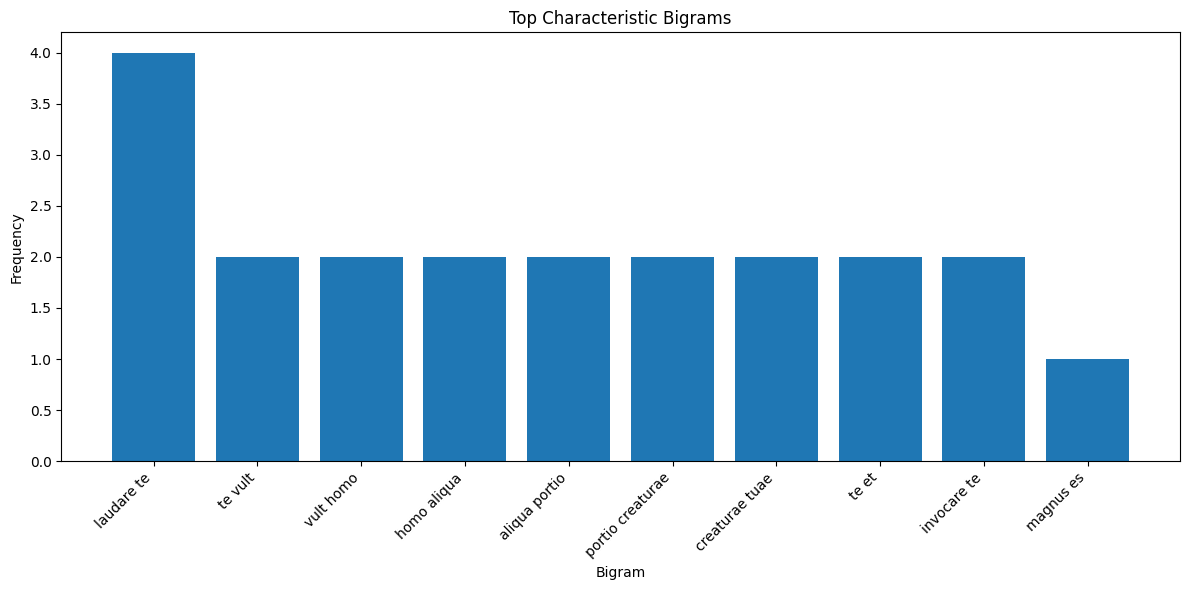


Top 10 Shared Bigrams:

Top 10 Shared Trigrams:

Author's Bigram Diversity: 0.8911


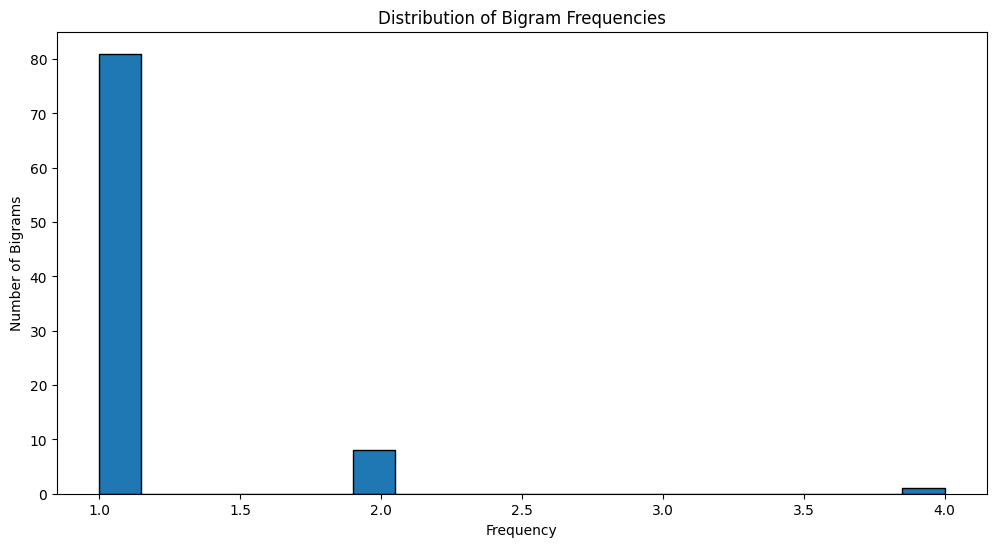

In [ ]:
import re
from collections import Counter
import matplotlib.pyplot as plt
from nltk import ngrams, download
import nltk.tokenize

# Download necessary NLTK data
download('punkt', quiet=True)

# Sample Latin texts (attributed to our medieval author - using excerpts from St. Augustine's Confessions)
author_texts = [
    """Magnus es, domine, et laudabilis valde: magna virtus tua, et sapientiae tuae non est numerus.
    et laudare te vult homo, aliqua portio creaturae tuae, et homo circumferens mortalitatem suam,
    circumferens testimonium peccati sui et testimonium, quia superbis resistis:
    et tamen laudare te vult homo, aliqua portio creaturae tuae.""",

    """Tu excitas, ut laudare te delectet, quia fecisti nos ad te et inquietum est cor nostrum,
    donec requiescat in te. da mihi, domine, scire et intellegere, utrum sit prius invocare te an laudare te,
    et scire te prius sit an invocare te. sed quis te invocat nesciens te? aliud enim pro alio potest invocare nesciens."""
]

# Sample comparison text (from other medieval Latin authors - using excerpts from Boethius' Consolation of Philosophy)
comparison_text = """
Carmina qui quondam studio florente peregi,
flebilis heu maestos cogor inire modos.
Ecce mihi lacerae dictant scribenda Camenae
et veris elegi fletibus ora rigant.
Has saltem nullus potuit pervincere terror,
ne nostrum comites prosequerentur iter.
"""

def preprocess_text(text):
    # Convert to lowercase and remove punctuation
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text

"A FUNCTION IS MISSING HERE"

def analyze_ngrams(texts, n):
    all_ngrams = []
    for text in texts:
        preprocessed = preprocess_text(text)
        all_ngrams.extend(get_ngrams(preprocessed, n))
    return Counter(all_ngrams)

# Analyze bigrams and trigrams for author's texts
author_bigrams = analyze_ngrams(author_texts, 2)
author_trigrams = analyze_ngrams(author_texts, 3)

# Analyze bigrams and trigrams for comparison text
comparison_bigrams = analyze_ngrams([comparison_text], 2)
comparison_trigrams = analyze_ngrams([comparison_text], 3)

def find_characteristic_ngrams(author_ngrams, comparison_ngrams, top_n=10):
    characteristic = {ngram: count for ngram, count in author_ngrams.items() if ngram not in comparison_ngrams}
    return sorted(characteristic.items(), key=lambda x: x[1], reverse=True)[:top_n]

# Find characteristic bigrams and trigrams
char_bigrams = find_characteristic_ngrams(author_bigrams, comparison_bigrams)
char_trigrams = find_characteristic_ngrams(author_trigrams, comparison_trigrams)

# Print results
print("Top 10 Characteristic Bigrams:")
for ngram, count in char_bigrams:
    print(f"{' '.join(ngram)}: {count}")

print("\nTop 10 Characteristic Trigrams:")
for ngram, count in char_trigrams:
    print(f"{' '.join(ngram)}: {count}")

# Visualize top bigrams
plt.figure(figsize=(12, 6))
plt.bar(range(len(char_bigrams)), [count for _, count in char_bigrams])
plt.xticks(range(len(char_bigrams)), [' '.join(ngram) for ngram, _ in char_bigrams], rotation=45, ha='right')
plt.title("Top Characteristic Bigrams")
plt.xlabel("Bigram")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

def find_shared_ngrams(author_ngrams, comparison_ngrams, top_n=10):
    shared = {ngram: author_ngrams[ngram] for ngram in author_ngrams if ngram in comparison_ngrams}
    return sorted(shared.items(), key=lambda x: x[1], reverse=True)[:top_n]

# Find shared bigrams and trigrams
shared_bigrams = find_shared_ngrams(author_bigrams, comparison_bigrams)
shared_trigrams = find_shared_ngrams(author_trigrams, comparison_trigrams)

print("\nTop 10 Shared Bigrams:")
for ngram, count in shared_bigrams:
    print(f"{' '.join(ngram)}: {count}")

print("\nTop 10 Shared Trigrams:")
for ngram, count in shared_trigrams:
    print(f"{' '.join(ngram)}: {count}")

# Calculate and print n-gram diversity
author_unique_bigrams = len(author_bigrams)
author_total_bigrams = sum(author_bigrams.values())
author_bigram_diversity = author_unique_bigrams / author_total_bigrams

print(f"\nAuthor's Bigram Diversity: {author_bigram_diversity:.4f}")

# Visualize n-gram distribution
plt.figure(figsize=(12, 6))
plt.hist(author_bigrams.values(), bins=20, edgecolor='black')
plt.title("Distribution of Bigram Frequencies")
plt.xlabel("Frequency")
plt.ylabel("Number of Bigrams")
plt.show()


## Solution

1:
```
def get_ngrams(text, n):
  words = text.split()
  return list(ngrams(words, n))
```





2:   